In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_io as tfio
from IPython import display

2022-07-03 13:36:46.673320: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX2 FMA
2022-07-03 13:36:46.806953: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


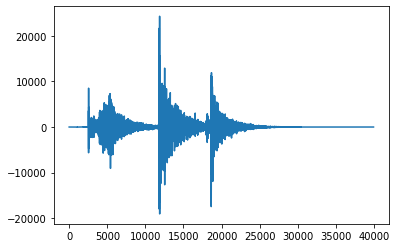

In [2]:
ds = [
    tfio.audio.AudioIOTensor('can-open-1.wav').to_tensor()[:, 0],
    tfio.audio.AudioIOTensor('hansa-0_33.wav').to_tensor()[:, 0]
]
ds = [tf.cast(x, tf.float32).numpy() for x in ds]
plt.plot(ds[0])

/Users/erik/olsprett/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


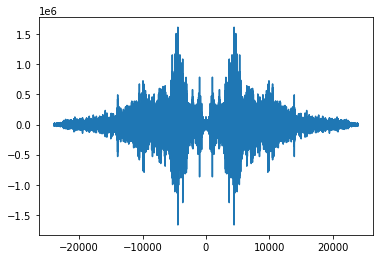

In [11]:
fs = 48000

fft = np.fft.fft(ds[0])
freq = np.fft.fftfreq(len(ds[0]), 1/fs)

plt.plot(freq, fft)
plt.show()

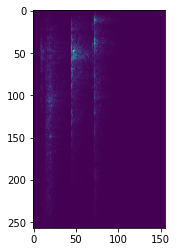

In [3]:
spectrogram = tfio.audio.spectrogram(ds[0], nfft=512, window=512, stride=256).numpy()
plt.imshow(spectrogram.T)

In [4]:
ds[1][:len(ds[0])] += ds[0]
waveform1 = ds[1]
print('Waveform shape:', waveform1.shape)
print('Audio playback')
display.Audio(waveform1, rate=48000)

Waveform shape: (114540,)
Audio playback
